### Context

**MovieLens** provides an online database of information related to films, television series, online streaming content – including cast, production crew, trivia, ratings, fan, and critical reviews. Every year in collaboration with a guest curator, MovieLens publish their annuals based on a theme providing a comprehensive view of a topic. Explore the movies that are a decade old and deliver a detailed analysis.

### Objective
Detailed analysis of 3 data sets explained below - 

#### Data Overview

- **movie.csv**: The file contains information related to the movies and their genres. All the genres contains binary values. 
 * Columns: 
   * **movie id:** id assigned to every movie
   * **movie title:** Title of the movie
   * **release date:** Date of release of the movie
   * The rest of the columns are different movie **genres** as follows - Action, Adventure, Animation, Children’s, Comedy, Crime, Documentary, Drama, Fantasy, Film-Noir, Horror, Musical, Mystery, Romance, Sci-Fi, Thriller, War, Western <br>
 <br>
- **user.csv**: It contains information about the users who have rated the movies. 
 * Columns:
   *  **user id:** id assigned to every user 
    * **age:** Age of the user
    * **gender:** Gender of the user
    * **occupation:** Occupation of the user
    * **zip code:** Zip code of the user<br><br>
- **ratings.csv**: It contains information for ratings given by the users to a particular movie. 
 * Columns:
   * **user id:** id assigned to every user
   * **movie id:** id assigned to every movie
   * **rating:** the rating given by the user
   * **timestamp:** Time recorded when the user gave a rating<br><br>

### Importing the necessary packages

In [1]:
import pandas as pd
import numpy as np
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

### Reading the datasets

In [2]:
# Reading datasets by using read_csv from pandas package
movie = pd.read_csv('2_movie.csv')
user = pd.read_csv('2_user.csv')
ratings = pd.read_csv('2_ratings.csv')

### Data Overview

- observe the first few rows of the dataset and check whether the dataset has been loaded or not
- get information about the number of rows and columns in the dataset
- find out the data types of the columns to ensure that data is stored in the preferred format and the value of each property is as expected.
- check the statistical summary of the dataset to get an overview of the numerical columns

#### User Dataset

In [3]:
user.head()

,user id,age,gender,occupation,zip code
0,1,24,M,technician,85711
1,2,53,F,other,94043
2,3,23,M,writer,32067
3,4,24,M,technician,43537
4,5,33,F,other,15213


- *The user dataset contains demographic information about the users who have rated the movies*
- *`user id` can be removed, as it is just a sequential id*
- *The column `gender` has values as M and F, where M represents Male users and F represents Female users*
- *We can also observe that users are from different occupational backgrounds like 'technician', 'writer', etc.*
- *The column `zip code` represents the area where the user is residing*

In [4]:
user.shape

(943, 5)

- *There are 943 rows and 5 columns in the user dataset.*

In [5]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 943 entries, 0 to 942
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user id     943 non-null    int64 
 1   age         943 non-null    int64 
 2   gender      943 non-null    object
 3   occupation  943 non-null    object
 4   zip code    943 non-null    object
dtypes: int64(2), object(3)
memory usage: 37.0+ KB


- *We can see that the `gender`, `occupation` and `zip code` columns are of object type while the other columns are of integer type since they are containing numbers in them.*
- *The data type of the `zip code` column is object which seems to be wrong and needs further investigation since this column seems to be containing integer values, as seen from the first 5 rows of the dataframe.*
- *there are no null values*

In [6]:
user.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user id,943.0,NaN,NaN,NaN,472.0,272.364951,1.0,236.5,472.0,707.5,943.0
age,943.0,NaN,NaN,NaN,34.051962,12.19274,7.0,25.0,31.0,43.0,73.0
gender,943,2,M,670,NaN,NaN,NaN,NaN,NaN,NaN,NaN
occupation,943,21,student,196,NaN,NaN,NaN,NaN,NaN,NaN,NaN
zip code,943,795,55414,9,NaN,NaN,NaN,NaN,NaN,NaN,NaN


- *`age` average age of users who have rated the movies is 34 years* 
- *`user id` is an unique identifier of the users who have rated the movies, interpreting its summary statistics won't yield meaningful insights.*
- *`occupation` Majority of the occupation is student with frequency of 196
- *`gender` Majority are male

#### Movie Dataset

In [7]:
movie.head()

,movie id,movie title,release date,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story,01-01-1995,0,0,1,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,GoldenEye,01-01-1995,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,Four Rooms,01-01-1995,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,4,Get Shorty,01-01-1995,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,Copycat,01-01-1995,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0


- *`movie` dataset contains information related to the movies and their genres. While `movie id`, `movie title`, and `release date` are information related to the movies, the rest of the columns are specifically the genres of the movies.*<br> 
- *The columns associated to the genres of the movies are having values of 0s and 1s. The value '1' means that a particular movie belongs to that genre while the value '0' represents that the movie is not a part of that genre. Movies have multiple genres*

In [8]:
movie.shape

(1680, 21)

- *There are 1680 rows and 21 columns in the movie dataset.*

In [9]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1680 non-null   int64 
 1   movie title   1680 non-null   object
 2   release date  1680 non-null   object
 3   Action        1680 non-null   int64 
 4   Adventure     1680 non-null   int64 
 5   Animation     1680 non-null   int64 
 6   Childrens     1680 non-null   int64 
 7   Comedy        1680 non-null   int64 
 8   Crime         1680 non-null   int64 
 9   Documentary   1680 non-null   int64 
 10  Drama         1680 non-null   int64 
 11  Fantasy       1680 non-null   int64 
 12  Film-Noir     1680 non-null   int64 
 13  Horror        1680 non-null   int64 
 14  Musical       1680 non-null   int64 
 15  Mystery       1680 non-null   int64 
 16  Romance       1680 non-null   int64 
 17  Sci-Fi        1680 non-null   int64 
 18  Thriller      1680 non-null   int64 
 19  War   

- *We can see that the `movie title` and `release date` columns are of object type since these columns are having some text in them.* 
- *`release date` should be of date type, instead of object
- *All the other columns are of integer type since they are containing numbers in them.*

In [10]:
# Converting the 'release date' column from object to a datetime variable
movie['release_date'] = pd.to_datetime(movie['release date'], format = "%d-%m-%Y")
# dropping the old 'release date' column
movie.drop('release date',axis=1,inplace = True)

In [11]:
movie.describe(include='all').T

,count,unique,top,freq,mean,min,25%,50%,75%,max,std
movie id,1680.0,NaN,NaN,NaN,841.525595,1.0,421.75,841.5,1261.25,1682.0,485.609591
movie title,1680,1657,That Darn Cat!,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Action,1680.0,NaN,NaN,NaN,0.149405,0.0,0.0,0.0,0.0,1.0,0.356593
Adventure,1680.0,NaN,NaN,NaN,0.080357,0.0,0.0,0.0,0.0,1.0,0.271926
Animation,1680.0,NaN,NaN,NaN,0.025,0.0,0.0,0.0,0.0,1.0,0.156171
Childrens,1680.0,NaN,NaN,NaN,0.072619,0.0,0.0,0.0,0.0,1.0,0.259587
Comedy,1680.0,NaN,NaN,NaN,0.300595,0.0,0.0,0.0,1.0,1.0,0.458653
Crime,1680.0,NaN,NaN,NaN,0.064881,0.0,0.0,0.0,0.0,1.0,0.246389
Documentary,1680.0,NaN,NaN,NaN,0.029762,0.0,0.0,0.0,0.0,1.0,0.16998
Drama,1680.0,NaN,NaN,NaN,0.431548,0.0,0.0,0.0,1.0,1.0,0.49544


- *The statistical summary of the `movie_id` column will not yield meaningful insights as it is a unique identifier of each of the movies.*
- *`Release_date` data contains movies released from 1922 thru 1998*
- *The statistical summary of the columns related to genres is also not much helpful since these columns consists of only 0s and 1s values.*

#### Ratings

In [12]:
ratings.head()

,user id,movie id,rating,timestamp
0,196,242,3,881250949
1,186,302,3,891717742
2,22,377,1,878887116
3,244,51,2,880606923
4,166,346,1,886397596


- *The ratings dataframe contains information about the ratings given by the users to a particular movie.*

In [13]:
ratings.shape

(100000, 4)

- *There are 100,000 rows and 4 columns in the ratings dataset. This is quite a large dataset as compared to the previous two dataframes.*

In [14]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user id    100000 non-null  int64
 1   movie id   100000 non-null  int64
 2   rating     100000 non-null  int64
 3   timestamp  100000 non-null  int64
dtypes: int64(4)
memory usage: 3.1 MB


In [15]:
ratings.describe().T

,count,mean,std,min,25%,50%,75%,max
user id,100000.0,4.624848e+02,2.666144e+02,1.0,254.0,447.0,682.0,943.0
movie id,100000.0,4.255301e+02,3.307984e+02,1.0,175.0,322.0,631.0,1682.0
rating,100000.0,3.529860e+00,1.125674e+00,1.0,3.0,4.0,4.0,5.0
timestamp,100000.0,8.835289e+08,5.343856e+06,874724710.0,879448709.5,882826944.0,888259984.0,893286638.0


- *The numbers for the `timestamp` column do not convey any meaningful insights.*
- *`rating` average rating of all the movies is around 3.53 while the ratings ranges from 1 to 5.*

**What is the trend of the number of movies released after 1990?**

Now, let's extract the `Years` from the release dates and create a column in the `movie` dataframe -

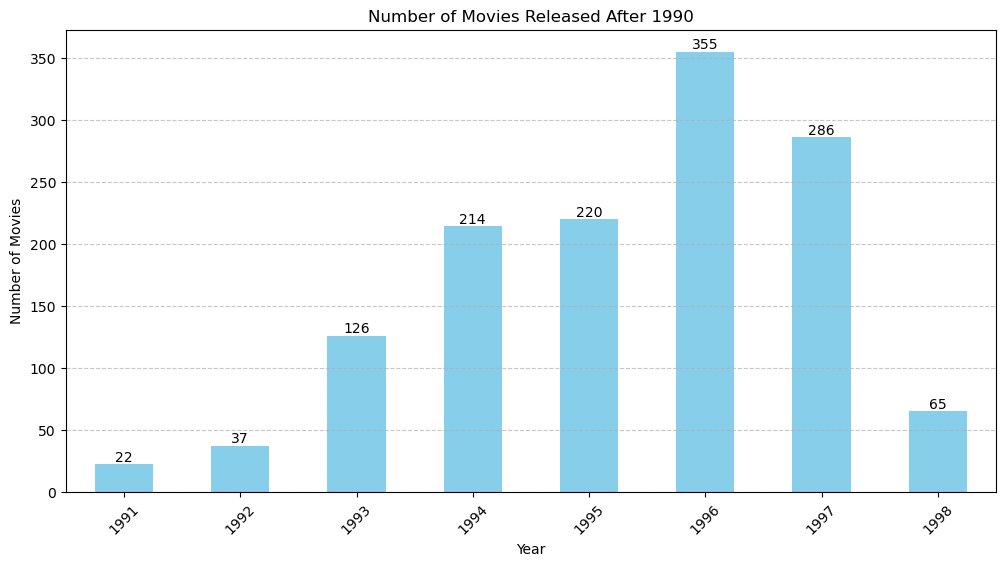

In [16]:
# extracting Year using datetime.year method
movie['Year'] = movie['release_date'].dt.year

# movie[movie['Year']>1990]['Year'].value_counts().sort_index().plot(kind='bar', figsize=(12, 6), color='skyblue')
# # movie[movie['Year']>1990]['Year'].value_counts().plot(kind='bar', figsize=(12, 6), color='skyblue')
# plt.title('Number of Movies Released After 1990')
# plt.xlabel('Year')
# plt.ylabel('Number of Movies')
# plt.xticks(rotation=45)
# plt.grid(axis='y', linestyle='--', alpha=0.7)
# plt.show()

# Prepare the data
counts = movie[movie['Year'] > 1990]['Year'].value_counts().sort_index()

# Create the bar plot
ax = counts.plot(kind='bar', figsize=(12, 6), color='skyblue')

plt.title('Number of Movies Released After 1990')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add the number of movies on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

- *We can observe that the highest number of movies with 355 in total have been released in 1996. Also, we can see that the count of the number of movies released in each year is increasing except for 1997 and 1998. So it can be said that, overall there is an upward trend in the number of movie released between the year 1991 and 1998.*
- *The top five 'years' with the highest number of movies released are '1996', '1997', '1995', '1994', and '1993'.* 

**How many movies belong to a particular genre?**

In [17]:
movie.head()

,movie id,movie title,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western,release_date,Year
0,1,Toy Story,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1995-01-01,1995
1,2,GoldenEye,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995
2,3,Four Rooms,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1995-01-01,1995
3,4,Get Shorty,1,0,0,0,1,0,0,1,...,0,0,0,0,0,0,0,0,1995-01-01,1995
4,5,Copycat,0,0,0,0,0,1,0,1,...,0,0,0,0,0,1,0,0,1995-01-01,1995


In [18]:
movie.columns   # Checking the column names of the movie dataframe

Index(['movie id', 'movie title', 'Action', 'Adventure', 'Animation',
       'Childrens', 'Comedy', 'Crime', 'Documentary', 'Drama', 'Fantasy',
       'Film-Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi',
       'Thriller', 'War', 'Western', 'release_date', 'Year'],
      dtype='object')

In [19]:
len(movie.columns) # Checking the number of columns in the movie dataframe

22

In [20]:
# extracting the genre columns
genres = movie.columns[2:20]

# Counting the number of movies in each genre
genre_counts = {genre: movie[genre].sum() for genre in genres}
genre_counts 

{'Action': 251,
 'Adventure': 135,
 'Animation': 42,
 'Childrens': 122,
 'Comedy': 505,
 'Crime': 109,
 'Documentary': 50,
 'Drama': 725,
 'Fantasy': 22,
 'Film-Noir': 24,
 'Horror': 92,
 'Musical': 56,
 'Mystery': 61,
 'Romance': 247,
 'Sci-Fi': 101,
 'Thriller': 251,
 'War': 71,
 'Western': 27}

In [21]:
# using list slicing to create a list which only contains the genres
movie[genres].sum().sort_values(ascending=False)

Drama          725
Comedy         505
Action         251
Thriller       251
Romance        247
Adventure      135
Childrens      122
Crime          109
Sci-Fi         101
Horror          92
War             71
Mystery         61
Musical         56
Documentary     50
Animation       42
Western         27
Film-Noir       24
Fantasy         22
dtype: int64

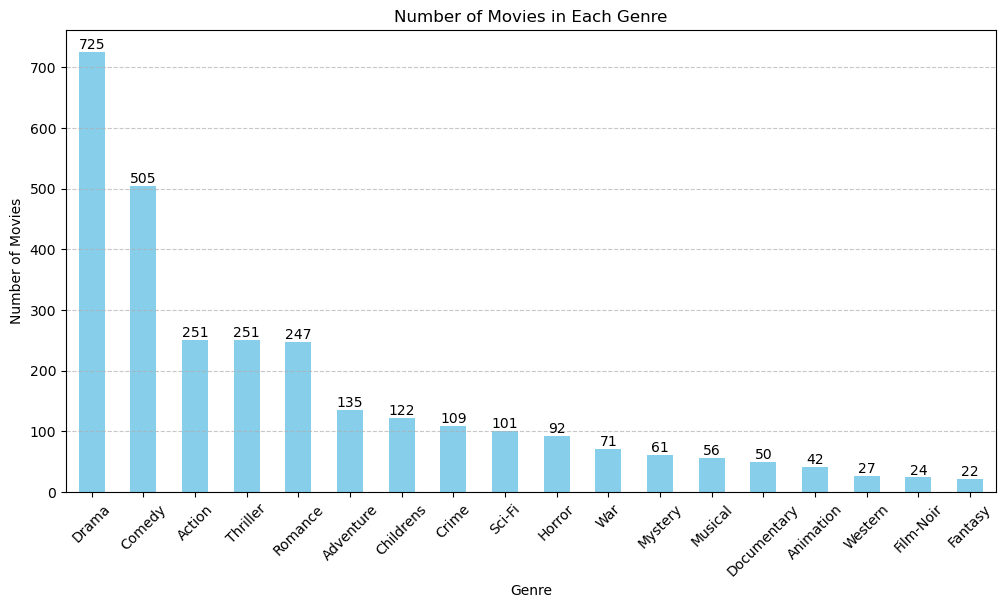

In [22]:
ax = movie[genres].sum().sort_values(ascending=False).plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Number of Movies in Each Genre')
plt.xlabel('Genre')
plt.ylabel('Number of Movies')
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

- *'Drama' genre has the highest number of movies with 725 in total followed by 'Comedy' at 505* 
- *The top five genres with the highest number of movies are 'Drama', 'Comedy', 'Action', 'Thriller', and 'Romance'* 
- *'Fantasy' genre has the lowest number of movies (22 in count)* 

**Which movies have more than one genre?**

Here is what we need to do - 
- For each row, add all the genres (1's) into a new column, then pick all the rows with more than 1

In [23]:
movie["Number of Genres"] = movie.loc[:, genres].sum(axis=1) # sum along the row. 

In [24]:
movie[movie['Number of Genres']>1].shape #this will subset the data as per the given condition

(849, 23)

In [25]:
# calculate % of movies with more than one genre
percentage_more_than_one_genre = (movie[movie['Number of Genres'] > 1].shape[0] / movie.shape[0]) * 100
print(f"Percentage of movies with more than one genre: {percentage_more_than_one_genre:.2f}%")  

Percentage of movies with more than one genre: 50.54%


**Can we find the genres that are most liked by the users?**


*We will need to join `movie` dataset with `rating` dataset on column `movie_id`*


**SQL correlation - Something to remember**

`INNER JOIN` - `pd.merge(df1,df2,how='inner')` - Returns records that have matching values in both tables <br>
`LEFT JOIN` - `pd.merge(df1,df2,how='left')` - Returns all records from the left table that have matched records from the right table<br>
`RIGHT JOIN` - `pd.merge(df1,df2,how='right')` - Returns all records from right table, that have matched records from the left table<br>
`OUTER JOIN` - `pd.merge(df1,df2,how='outer')` - Returns all records from left and right where there is match

In [26]:
df_merge = movie.merge(ratings, on = 'movie id', how = 'inner')
df_merge.head()

,movie id,movie title,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Sci-Fi,Thriller,War,Western,release_date,Year,Number of Genres,user id,rating,timestamp
0,1,Toy Story,0,0,1,1,1,0,0,0,...,0,0,0,0,1995-01-01,1995,3,308,4,887736532
1,1,Toy Story,0,0,1,1,1,0,0,0,...,0,0,0,0,1995-01-01,1995,3,287,5,875334088
2,1,Toy Story,0,0,1,1,1,0,0,0,...,0,0,0,0,1995-01-01,1995,3,148,4,877019411
3,1,Toy Story,0,0,1,1,1,0,0,0,...,0,0,0,0,1995-01-01,1995,3,280,4,891700426
4,1,Toy Story,0,0,1,1,1,0,0,0,...,0,0,0,0,1995-01-01,1995,3,66,3,883601324


In [27]:
df_merge.shape

(99990, 26)

Follow 2 steps - 
- replace the 1's with actual rating from the user
- find mean rating for each genre

In [28]:
# creating an empty dataframe
mean_rating = pd.DataFrame()

# Iterating through the columns of df_merge to extract and store the ratings for each genre
for i in genres:
  mean_rating[i] = np.where(df_merge[i]==1,df_merge['rating'],np.nan)

# printing the newly created dataframe
mean_rating.head()

,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,5.0,5.0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,4.0,4.0,4.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,3.0,3.0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [29]:
# Calculating the mean of each column and sorting them in ascending order
mean_rating.mean(axis=0).sort_values(ascending = False)

Film-Noir      3.921523
War            3.815812
Drama          3.687379
Documentary    3.672823
Mystery        3.638132
Crime          3.632278
Romance        3.621705
Western        3.613269
Animation      3.576699
Sci-Fi         3.560723
Musical        3.521397
Thriller       3.509007
Adventure      3.503527
Action         3.480245
Comedy         3.394073
Childrens      3.353244
Horror         3.290389
Fantasy        3.215237
dtype: float64

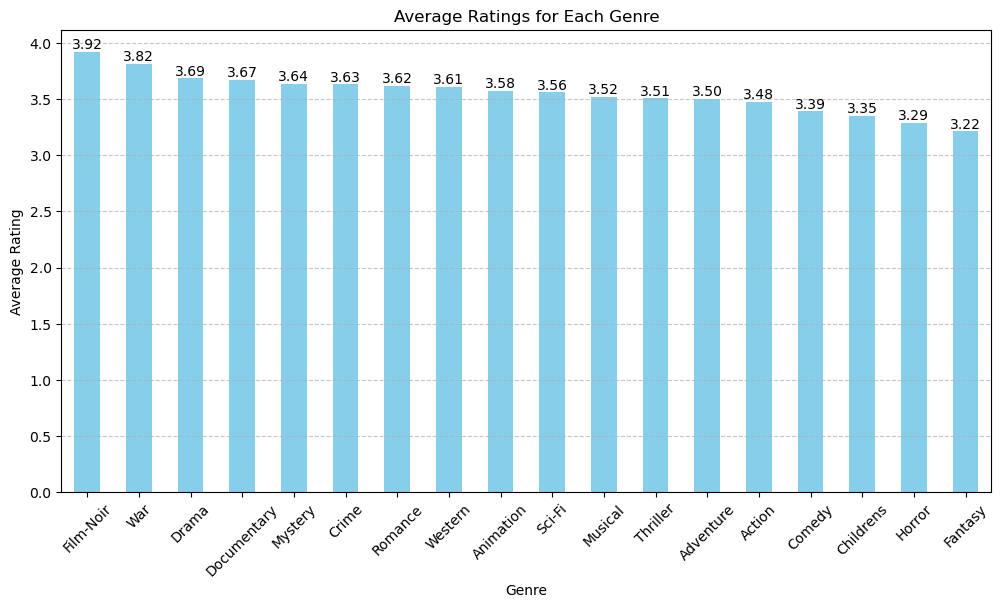

In [30]:
ax = mean_rating.mean(axis=0).sort_values(ascending = False).plot(kind='bar', figsize=(12, 6), color='skyblue')
plt.title('Average Ratings for Each Genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')    
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
# Add count labels on top of each bar
for p in ax.patches:
    ax.annotate(f"{p.get_height():.2f}", (p.get_x() + p.get_width() / 2, p.get_height()),
                ha='center', va='bottom', fontsize=10, color='black')

plt.show()

**Findings**

- *'Film-Noir' genre is having the highest average ratings with an average rating of 3.92 followed by 'War' genre with rating of 3.81*. So, the majority of the population tends to like the 'Film-Noir' and 'War' movies compared to any other movies genres.

**Can we find out top 25 movies which received hightest ratings**

We will utilize `df_merge` dataframe for this. 

In [31]:
df_merge.head()

,movie id,movie title,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,Sci-Fi,Thriller,War,Western,release_date,Year,Number of Genres,user id,rating,timestamp
0,1,Toy Story,0,0,1,1,1,0,0,0,...,0,0,0,0,1995-01-01,1995,3,308,4,887736532
1,1,Toy Story,0,0,1,1,1,0,0,0,...,0,0,0,0,1995-01-01,1995,3,287,5,875334088
2,1,Toy Story,0,0,1,1,1,0,0,0,...,0,0,0,0,1995-01-01,1995,3,148,4,877019411
3,1,Toy Story,0,0,1,1,1,0,0,0,...,0,0,0,0,1995-01-01,1995,3,280,4,891700426
4,1,Toy Story,0,0,1,1,1,0,0,0,...,0,0,0,0,1995-01-01,1995,3,66,3,883601324


As multiple rating has been given to a single movie from different users, to find out movies preferred by users, lets get the average rating of each movie

In [32]:
avg_rating = df_merge.groupby('movie title')['rating'].mean().reset_index().sort_values(by='rating', ascending=False)
avg_rating.rename(columns={'rating':'Avg_rating'},inplace=True)
avg_rating.head(25) # Top 25 movies with highest average rating

,movie title,Avg_rating
631,"Great Day in Harlem, A",5.000000
1170,Prefontaine,5.000000
1354,Someone Else's America,5.000000
461,Entertaining Angels: The Dorothy Day Story,5.000000
942,Marlene Dietrich: Shadow and Light (,5.000000
1382,Star Kid,5.000000
1466,They Made Me a Criminal,5.000000
30,Aiqing wansui,5.000000
1270,"Saint of Fort Washington, The",5.000000
1274,Santa with Muscles,5.000000


**Can we find out top 25 movies which received most number of ratings**

In [33]:
movie_count = df_merge.groupby('movie title')['rating'].count().reset_index().sort_values(by='rating', ascending=False)
movie_count.rename(columns={'rating':'Avg_rating'},inplace=True)
movie_count.head(25) # Top 25 movies with highest average rating

,movie title,Avg_rating
1393,Star Wars,583
332,Contact,509
497,Fargo,508
1232,Return of the Jedi,507
858,Liar Liar,485
459,"English Patient, The",481
1280,Scream,478
1517,Toy Story,452
32,Air Force One,431
742,Independence Day (ID4),429


**Lets Merge User data and see what analysis we can do**

In [34]:
# Merging user dataset with movie and ratings(already merged : df_merge) dataset
df_merge_all = df_merge.merge(user, on = 'user id', how = 'inner')

In [35]:
df_merge_all.head()

,movie id,movie title,Action,Adventure,Animation,Childrens,Comedy,Crime,Documentary,Drama,...,release_date,Year,Number of Genres,user id,rating,timestamp,age,gender,occupation,zip code
0,1,Toy Story,0,0,1,1,1,0,0,0,...,1995-01-01,1995,3,308,4,887736532,60,M,retired,95076
1,4,Get Shorty,1,0,0,0,1,0,0,1,...,1995-01-01,1995,3,308,5,887737890,60,M,retired,95076
2,5,Copycat,0,0,0,0,0,1,0,1,...,1995-01-01,1995,3,308,4,887739608,60,M,retired,95076
3,7,Twelve Monkeys,0,0,0,0,0,0,0,1,...,1995-01-01,1995,2,308,4,887738847,60,M,retired,95076
4,8,Babe,0,0,0,1,1,0,0,1,...,1995-01-01,1995,3,308,5,887736696,60,M,retired,95076


In [36]:
df_merge_all.groupby('gender').rating.mean() #grouping the dataset on 'gender' column and taking the average of ratings

gender
F    3.531510
M    3.529333
Name: rating, dtype: float64

In [37]:
df_merge_all.groupby('occupation').rating.mean().sort_values(ascending= False) #grouping the dataset on 'occupation' column and taking the average of ratings.

occupation
none             3.777778
lawyer           3.735316
doctor           3.688889
educator         3.670692
artist           3.653380
administrator    3.635646
scientist        3.611273
salesman         3.582944
programmer       3.568205
librarian        3.560781
other            3.552335
engineer         3.541473
technician       3.532097
student          3.515167
marketing        3.485641
retired          3.466750
entertainment    3.440783
writer           3.376152
executive        3.349794
homemaker        3.301003
healthcare       2.896220
Name: rating, dtype: float64

- *Users who are not working have given highest ratings as compared to users who are working professionals* 
- *Healthcare workers have given lowest ratings on an average* 

**Thank You**